### Required Questions: Please answer completely all four required questions.

#### Question 1
Programmatically download and load into your favorite analytical tool the trip data for September 2015.
Report how many rows and columns of data you have loaded.

#### Question 2
Plot a histogram of the number of the trip distance ("Trip Distance").
Report any structure you find and any hypotheses you have about that structure.

#### Question 3
Report mean and median trip distance grouped by hour of day.
We'd like to get a rough sense of identifying trips that originate or terminate at one of the NYC area airports. Can you provide a count of how many transactions fit this criteria, the average fair, and any other interesting characteristics of these trips.

#### Question 4
Build a derived variable for tip as a percentage of the total fare.
Build a predictive model for tip as a percentage of the total fare. Use as much of the data as you like (or all of it). We will validate a sample.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#### Question 1
Programmatically download and load into your favorite analytical tool the trip data for September 2015.
Report how many rows and columns of data you have loaded.

In [2]:
# Dataset can be loaded from url provided by TLC
#url = "https://s3.amazonaws.com/nyc-tlc/trip+data/green_tripdata_2015-09.csv"
# In this notebook, the data has been downloaded to local computer
trips = pd.read_csv('./data/green_tripdata_2015-09.csv')

In [3]:
# Inspect number of rows/columns
print "Number of rows = %i" % (trips.shape[0])
print "Number of columns = %i" % (trips.shape[1])

Number of rows = 1494926
Number of columns = 21


In [4]:
# I also examined column description
# Data dictionaries can be found at 
# http://www.nyc.gov/html/tlc/downloads/pdf/data_dictionary_trip_records_green.pdf
print trips.columns

Index([u'VendorID', u'lpep_pickup_datetime', u'Lpep_dropoff_datetime',
       u'Store_and_fwd_flag', u'RateCodeID', u'Pickup_longitude',
       u'Pickup_latitude', u'Dropoff_longitude', u'Dropoff_latitude',
       u'Passenger_count', u'Trip_distance', u'Fare_amount', u'Extra',
       u'MTA_tax', u'Tip_amount', u'Tolls_amount', u'Ehail_fee',
       u'improvement_surcharge', u'Total_amount', u'Payment_type',
       u'Trip_type '],
      dtype='object')


In [5]:
# A quick look on data
trips.head()

,VendorID,lpep_pickup_datetime,Lpep_dropoff_datetime,Store_and_fwd_flag,RateCodeID,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,...,Fare_amount,Extra,MTA_tax,Tip_amount,Tolls_amount,Ehail_fee,improvement_surcharge,Total_amount,Payment_type,Trip_type
0,2,2015-09-01 00:02:34,2015-09-01 00:02:38,N,5,-73.979485,40.684956,-73.979431,40.685020,1,...,7.8,0.0,0.0,1.95,0.0,NaN,0.0,9.75,1,2.0
1,2,2015-09-01 00:04:20,2015-09-01 00:04:24,N,5,-74.010796,40.912216,-74.010780,40.912212,1,...,45.0,0.0,0.0,0.00,0.0,NaN,0.0,45.00,1,2.0
2,2,2015-09-01 00:01:50,2015-09-01 00:04:24,N,1,-73.921410,40.766708,-73.914413,40.764687,1,...,4.0,0.5,0.5,0.50,0.0,NaN,0.3,5.80,1,1.0
3,2,2015-09-01 00:02:36,2015-09-01 00:06:42,N,1,-73.921387,40.766678,-73.931427,40.771584,1,...,5.0,0.5,0.5,0.00,0.0,NaN,0.3,6.30,2,1.0
4,2,2015-09-01 00:00:14,2015-09-01 00:04:20,N,1,-73.955482,40.714046,-73.944412,40.714729,1,...,5.0,0.5,0.5,0.00,0.0,NaN,0.3,6.30,2,1.0


In [6]:
# Check the completeness of data
trips.isnull().sum()

VendorID                       0
lpep_pickup_datetime           0
Lpep_dropoff_datetime          0
Store_and_fwd_flag             0
RateCodeID                     0
Pickup_longitude               0
Pickup_latitude                0
Dropoff_longitude              0
Dropoff_latitude               0
Passenger_count                0
Trip_distance                  0
Fare_amount                    0
Extra                          0
MTA_tax                        0
Tip_amount                     0
Tolls_amount                   0
Ehail_fee                1494926
improvement_surcharge          0
Total_amount                   0
Payment_type                   0
Trip_type                      4
dtype: int64

It seems the data completeness is very good. Only the field 'Ehail_fee' is null for all rows. There is no definition of this field in data dictionaries so we will ignore this field in the analysis and modeling

#### Question 2
Plot a histogram of the number of the trip distance ("Trip Distance").
Report any structure you find and any hypotheses you have about that structure.

In [7]:
# Summary statistics
print "Mean = %.3f" % trips.Trip_distance.mean()
print "Standard deviation = %.3f" % trips.Trip_distance.std()
print "Median = %.3f" % trips.Trip_distance.median()
print "Min = %.3f" % trips.Trip_distance.min()
print "Max = %.3f" % trips.Trip_distance.max()

Mean = 2.968
Standard deviation = 3.077
Median = 1.980
Min = 0.000
Max = 603.100


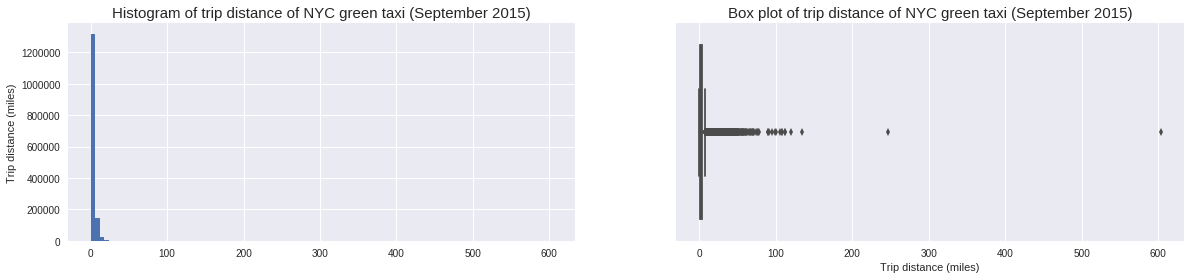

In [8]:
# Plot histogram and Box-plot to visualize Trip_distance
# Create a figure instance, and the two subplots
fig = plt.figure(figsize = (20,4))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

p1 = trips.Trip_distance.hist(bins=100, ax=ax1)
p2 = sns.boxplot(trips.Trip_distance, ax=ax2)

ax1.set(ylabel='Trip distance (miles)')
ax1.set_title("Histogram of trip distance of NYC green taxi (September 2015)", size=15)

ax2.set(xlabel='Trip distance (miles)')
ax2.set_title("Box plot of trip distance of NYC green taxi (September 2015)", size=15)

In [9]:
check_col = ['lpep_pickup_datetime','Lpep_dropoff_datetime','Pickup_longitude','Pickup_latitude',
       'Dropoff_longitude','Dropoff_latitude','RateCodeID','Passenger_count','Trip_distance','Fare_amount',
       'Tip_amount','Tolls_amount','Total_amount','Payment_type']

In [10]:
# Let's also check rows with Trip distance > 100 miles to see if they are valid outliers
trips[trips.Trip_distance > 100][check_col]

,lpep_pickup_datetime,Lpep_dropoff_datetime,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,RateCodeID,Passenger_count,Trip_distance,Fare_amount,Tip_amount,Tolls_amount,Total_amount,Payment_type
478080,2015-09-10 21:15:00,2015-09-11 00:52:07,-73.871719,40.771744,-76.121590,42.799343,5,1,246.28,300.00,77.44,9.75,387.19,1
516757,2015-09-11 17:22:50,2015-09-11 20:39:48,-73.937775,40.800926,-72.269753,40.928116,1,1,120.13,316.00,0.00,0.00,317.80,2
885097,2015-09-18 20:21:27,2015-09-18 22:36:04,-73.958954,40.819847,-72.258629,40.930805,1,1,100.74,258.50,0.00,0.00,259.80,2
944537,2015-09-19 18:49:29,2015-09-19 21:06:23,-73.961609,40.805958,-72.261024,41.917648,1,1,134.70,342.50,102.95,0.00,446.25,1
1077032,2015-09-22 10:30:53,2015-09-22 12:28:59,-73.898193,40.749580,-73.899033,40.746319,1,1,105.65,271.50,0.00,15.29,287.59,2
1282594,2015-09-26 17:23:52,2015-09-27 00:00:00,-73.803436,40.677845,-73.840210,40.719513,5,2,108.62,180.00,18.08,0.00,198.88,1
1321961,2015-09-27 03:13:48,2015-09-27 03:24:12,-73.937164,40.804386,-73.901382,40.819443,1,1,603.10,1.25,0.00,0.00,2.55,2
1416994,2015-09-29 10:45:52,2015-09-29 16:55:23,-73.931129,40.693161,-73.936172,40.685581,1,2,112.60,389.00,0.00,41.08,430.88,1
1432692,2015-09-29 17:01:17,2015-09-29 17:01:19,-73.936172,40.685581,-73.936172,40.685581,3,1,112.60,20.00,6.35,0.00,27.65,1
1457965,2015-09-30 09:42:56,2015-09-30 09:42:56,-73.914627,40.871475,-73.912315,40.872181,5,1,108.50,18.00,0.00,0.00,18.30,2


There seems to be an unusual data point: Trip distance is 603.1 miles but the fare amount is only 1.25. Let's also check rows with Trip distance > 100 miles to see if they are valid outliers. It is likely to be caused by data entry error. Also, there are two data points with trip distance of 112.60 and 108.50 miles but the fare amounts of \$20 and \$18 respectively. These two data points seem unusual as well. 

However, at this point, we will only remove that one data point which we are confident that it's an outlier due to data entry error

In [11]:
# Remove outlier (600 miles) and assign new dataframe 'clean_trips'
clean_trips = trips[trips.Trip_distance < 600]

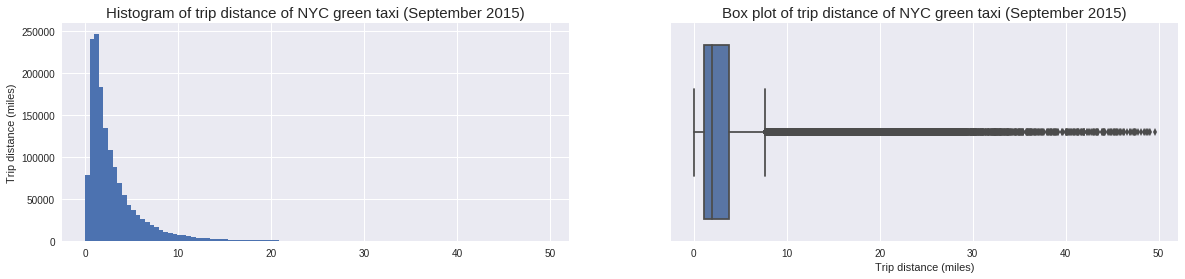

In [12]:
# To better visualize the trip distance in general we will only plot histogram for 
# the trips with trip distance less than 50 miles
fig = plt.figure(figsize = (20,4))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
p1 = clean_trips[clean_trips.Trip_distance < 50].Trip_distance.hist(bins=100, ax=ax1)
p2 = sns.boxplot(clean_trips[clean_trips.Trip_distance < 50].Trip_distance, ax=ax2)

ax1.set(ylabel='Trip distance (miles)')
ax1.set_title("Histogram of trip distance of NYC green taxi (September 2015)", size=15)

ax2.set(xlabel='Trip distance (miles)')
ax2.set_title("Box plot of trip distance of NYC green taxi (September 2015)", size=15)

By plotting only the data points where the trip distance is less than 50 miles, we can see clearer visualization on the trip distance distribution

In summary, the trip distance data has right-skewed distribution, where mean (2.968 miles) is less than median (1.980 miles). In this case, median would be better measure of the average trip distance. We can say that the average trip distance of the green taxis's trips in September 2015 is about 2 miles.

#### Question 3
Report mean and median trip distance grouped by hour of day.
We'd like to get a rough sense of identifying trips that originate or terminate at one of the NYC area airports. Can you provide a count of how many transactions fit this criteria, the average fair, and any other interesting characteristics of these trips.

##### Mean and median trip distance grouped by hour of day
We will use hour from pickup date/time (lpep_pickup_datetime) field

In [13]:
clean_trips['lpep_pickup_datetime'].max(), clean_trips['lpep_pickup_datetime'].min()

('2015-09-30 23:59:58', '2015-09-01 00:00:00')

In [14]:
# We will use pick-up date/time to calculate mean/median of trip distance by hour of day
# Convert to datetime data type
clean_trips['pickup_datetime'] = pd.to_datetime(clean_trips['lpep_pickup_datetime'], format='%Y-%m-%d %H:%M:%S')
clean_trips['dropoff_datetime'] = pd.to_datetime(clean_trips['Lpep_dropoff_datetime'], format='%Y-%m-%d %H:%M:%S')
# Extract hour data
clean_trips['hour_pickup'] = clean_trips['pickup_datetime'].dt.hour
clean_trips['hour_dropoff'] = clean_trips['dropoff_datetime'].dt.hour

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inst

In [15]:
# Trip distance by hour of day (based on pickup hour of day)
distance_by_hour_pickup = clean_trips.groupby('hour_pickup').agg({'Trip_distance':(np.mean,np.median)})

In [16]:
distance_by_hour_pickup.reset_index()

hour_pickup Trip_distance       
                        mean median
0            0      3.115276   2.20
1            1      3.017347   2.12
2            2      3.046176   2.14
3            3      3.193985   2.20
4            4      3.526555   2.36
5            5      4.133474   2.90
6            6      4.055149   2.84
7            7      3.284394   2.17
8            8      3.048450   1.98
9            9      2.999105   1.96
10          10      2.944482   1.92
11          11      2.912015   1.88
12          12      2.903065   1.89
13          13      2.878294   1.84
14          14      2.864304   1.83
15          15      2.857040   1.81
16          16      2.779852   1.80
17          17      2.679114   1.78
18          18      2.653222   1.80
19          19      2.715597   1.85
20          20      2.777052   1.90
21          21      2.999189   2.03
22          22      3.185394   2.20
23          23      3.191538   2.22

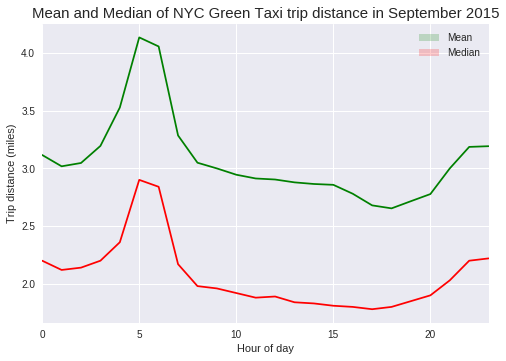

In [17]:
# Plot mean/median trip distance
ax = sns.tsplot(distance_by_hour_pickup['Trip_distance']['mean'], color='g')
sns.tsplot(distance_by_hour_pickup['Trip_distance']['median'], color='r')

ax.set(xlabel='Hour of day')
ax.set(ylabel='Trip distance (miles)')
ax.set_title("Mean and Median of NYC Green Taxi trip distance in September 2015", size=15)
ax.legend(labels=['Mean','Median'])

##### Trip from/to NYC area airports

In [18]:
trips.RateCodeID.value_counts()

1     1454464
5       33943
2        4435
3        1117
4         925
6          36
99          6
Name: RateCodeID, dtype: int64

There are three major airports in NYC area: JFK, La Guardia and Newark (in NJ)

According to fare types defined by TLC (http://www.nyc.gov/html/tlc/html/passenger/taxicab_rate.shtml), taxi trip from/to JFK and Newark are of special RateCodeID '2' and '3' respectively whereas the trip from/to La Guardia is standard (metered) fare (RateCodeID = '1').

For this question, I will analyze the trip from/to JFK, which is the largest airport among the three.

In [19]:
# Filter trip from/to JFK i.e. RatedCodeID = 2
jfk_trips = trips[trips.RateCodeID==2]

In [20]:
print "Number of trip from/to JFK = %s trips" % jfk_trips.shape[0]

Number of trip from/to JFK = 4435 trips


In [21]:
jfk_trips.columns

Index([u'VendorID', u'lpep_pickup_datetime', u'Lpep_dropoff_datetime',
       u'Store_and_fwd_flag', u'RateCodeID', u'Pickup_longitude',
       u'Pickup_latitude', u'Dropoff_longitude', u'Dropoff_latitude',
       u'Passenger_count', u'Trip_distance', u'Fare_amount', u'Extra',
       u'MTA_tax', u'Tip_amount', u'Tolls_amount', u'Ehail_fee',
       u'improvement_surcharge', u'Total_amount', u'Payment_type',
       u'Trip_type '],
      dtype='object')

In [156]:
# Average Fare for trips from/to JFK Airport
print "Trips from/to JFK Airport"
print "Average Trip distance = %.3f miles" % jfk_trips.Trip_distance.mean()
print "Average Fare amount = $%.2f" % jfk_trips.Fare_amount.mean()
print "Average Tolls amount = $%.2f" % jfk_trips.Tolls_amount.mean()
print "Average Tip amount = $%.2f" % jfk_trips.Tip_amount.mean()

Trips from/to JFK Airport
Average Trip distance = 10.245 miles
Average Fare amount = $49.02
Average Tolls amount = $2.68
Average Tip amount = $4.08


In [157]:
standard_trips = trips[trips.RateCodeID==1]

In [158]:
# Average Fare for Standard trip (Rate code = 1)
print "Standard trips"
print "Average Trip distance = %.3f miles" % standard_trips.Trip_distance.mean()
print "Average Fare amount = $%.2f" % standard_trips.Fare_amount.mean()
print "Average Tolls amount = $%.2f" % standard_trips.Tolls_amount.mean()
print "Average Tip amount = $%.2f" % standard_trips.Tip_amount.mean()

Standard trips
Average Trip distance = 2.923 miles
Average Fare amount = $12.24
Average Tolls amount = $0.11
Average Tip amount = $1.23


##### Alternative approach by using Lat/Lon coordinates
An alternative approach is to convert pickup/dropoff location (in latitude/longitude) into geographic information such as neighborhood. One of which is Neighborhood Tabulation Areas (NTAs).

We will need NTA shapefile to find out which neighborhood (NTA) the pickup/dropoff locations are in. The NTA code for JFK airport is QN98

The NYC NTA Shape file can be downloaded from: https://www1.nyc.gov/site/planning/data-maps/open-data/dwn-nynta.page

The code to processing geographic information is adapted from https://gis.stackexchange.com/questions/174159/convert-a-pandas-dataframe-to-a-geodataframe

In [161]:
import geopandas
#import geocoder
from geopandas.tools import sjoin
from shapely.geometry import Point

In [162]:
poly = geopandas.GeoDataFrame.from_file('./data/nynta_17a/nynta.shp')

In [165]:
clean_trips.columns

Index([u'VendorID', u'lpep_pickup_datetime', u'Lpep_dropoff_datetime',
       u'Store_and_fwd_flag', u'RateCodeID', u'Pickup_longitude',
       u'Pickup_latitude', u'Dropoff_longitude', u'Dropoff_latitude',
       u'Passenger_count', u'Trip_distance', u'Fare_amount', u'Extra',
       u'MTA_tax', u'Tip_amount', u'Tolls_amount', u'Ehail_fee',
       u'improvement_surcharge', u'Total_amount', u'Payment_type',
       u'Trip_type ', u'pickup_datetime', u'dropoff_datetime', u'hour_pickup',
       u'hour_dropoff', u'seconds_diff', u'geometry'],
      dtype='object')

In [166]:
clean_trips['geometry_pickup'] = clean_trips.apply(lambda x: Point((float(x.Pickup_longitude), float(x.Pickup_latitude))), axis=1)
clean_trips['geometry_dropoff'] = clean_trips.apply(lambda x: Point((float(x.Dropoff_longitude), float(x.Dropoff_latitude))), axis=1)

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [167]:
gdata_pickup = geopandas.GeoDataFrame(clean_trips, geometry='geometry_pickup')
gdata_pickup .crs = {'init' :'epsg:4326'} # Setting the current reference system
gdata_pickup .to_crs(crs=poly.crs, inplace=True) # Translating into the poly reference system

gdata_dropoff = geopandas.GeoDataFrame(clean_trips, geometry='geometry_dropoff')
gdata_dropoff .crs = {'init' :'epsg:4326'} # Setting the current reference system
gdata_dropoff .to_crs(crs=poly.crs, inplace=True) # Translating into the poly reference system

In [170]:
pickup_nta = sjoin(poly, gdata_pickup, how='left', op='contains')
dropoff_nta = sjoin(poly, gdata_dropoff, how='left', op='contains')

In [178]:
pickup_nta.shape, dropoff_nta.shape, clean_trips.shape

((1491749, 37), (1487681, 37), (1494925, 29))

In [176]:
print "The number of trips from JFK Airport: %s trips" % pickup_nta[pickup_nta.NTACode=='QN98'].shape[0]
print "The number of trips to JFK Airport: %s trips" % dropoff_nta[dropoff_nta.NTACode=='QN98'].shape[0]

The number of trips from JFK Airport: 711 trips
The number of trips to JFK Airport: 34657 trips


In [184]:
pickup_nta.isnull().sum()

BoroCode                       0
BoroName                       0
CountyFIPS                     0
NTACode                        0
NTAName                        0
Shape_Leng                     0
Shape_Area                     0
geometry_left                  0
index_right                   10
VendorID                      10
lpep_pickup_datetime          10
Lpep_dropoff_datetime         10
Store_and_fwd_flag            10
RateCodeID                    10
Pickup_longitude              10
Pickup_latitude               10
Dropoff_longitude             10
Dropoff_latitude              10
Passenger_count               10
Trip_distance                 10
Fare_amount                   10
Extra                         10
MTA_tax                       10
Tip_amount                    10
Tolls_amount                  10
Ehail_fee                1491749
improvement_surcharge         10
Total_amount                  10
Payment_type                  10
Trip_type                     14
pickup_dat

In [185]:
dropoff_nta.isnull().sum()

BoroCode                       0
BoroName                       0
CountyFIPS                     0
NTACode                        0
NTAName                        0
Shape_Leng                     0
Shape_Area                     0
geometry_left                  0
index_right                    2
VendorID                       2
lpep_pickup_datetime           2
Lpep_dropoff_datetime          2
Store_and_fwd_flag             2
RateCodeID                     2
Pickup_longitude               2
Pickup_latitude                2
Dropoff_longitude              2
Dropoff_latitude               2
Passenger_count                2
Trip_distance                  2
Fare_amount                    2
Extra                          2
MTA_tax                        2
Tip_amount                     2
Tolls_amount                   2
Ehail_fee                1487681
improvement_surcharge          2
Total_amount                   2
Payment_type                   2
Trip_type                      2
pickup_dat

In [179]:
jfk_pickup = pickup_nta[pickup_nta.NTACode=='QN98'][['Trip_distance','Fare_amount','Tolls_amount','Tip_amount']]
jfk_dropoff = dropoff_nta[dropoff_nta.NTACode=='QN98'][['Trip_distance','Fare_amount','Tolls_amount','Tip_amount']]
jfk_airport_trips = pd.concat((jfk_pickup, jfk_dropoff))

In [181]:
non_jfk_pickup = pickup_nta[pickup_nta.NTACode!='QN98'][['Trip_distance','Fare_amount','Tolls_amount','Tip_amount']]
non_jfk_dropoff = dropoff_nta[dropoff_nta.NTACode!='QN98'][['Trip_distance','Fare_amount','Tolls_amount','Tip_amount']]
non_jfk_airport_trips = pd.concat((non_jfk_pickup, non_jfk_dropoff))

In [183]:
jfk_airport_trips.shape, non_jfk_airport_trips.shape

((35368, 4), (2944062, 4))

In [55]:
pointInGeo[pointInGeo.NTACode=='QN98'].RateCodeID.value_counts()

5.0    372
1.0    310
2.0     25
3.0      3
4.0      1
Name: RateCodeID, dtype: int64

In [58]:
pointInGeo.BoroName.value_counts()

Brooklyn         567970
Manhattan        426111
Queens           412820
Bronx             84741
Staten Island       107
Name: BoroName, dtype: int64

#### Question 4
Build a derived variable for tip as a percentage of the total fare.
Build a predictive model for tip as a percentage of the total fare. Use as much of the data as you like (or all of it). We will validate a sample.

In [25]:
print "Number of trips with Tip amount = 0: %s" % len(clean_trips[clean_trips.Tip_amount==0])
print "Number of trips with Tip amount < 0: %s" % len(clean_trips[clean_trips.Tip_amount<0])
print "Number of trips with Tip amount > 0: %s" % len(clean_trips[clean_trips.Tip_amount>0])

Number of trips with Tip amount = 0: 892155
Number of trips with Tip amount < 0: 38
Number of trips with Tip amount > 0: 602732


According to the data dictionaries provided by TLC, Tip_amount field only records credit card tips, not cash tips. Hence, the Tip_amount value = 0 could be either actual no tip or tip not recorded. 

There is another column called 'Payment_type', which specify different type of payment.

I decided not to include the trips with Tip amount = 0 in building the predictive model since I think they do not the represent ground truth

In [26]:
clean_trips[(clean_trips.Payment_type==2) & (clean_trips.Tip_amount > 0)][check_col]

,lpep_pickup_datetime,Lpep_dropoff_datetime,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,RateCodeID,Passenger_count,Trip_distance,Fare_amount,Tip_amount,Tolls_amount,Total_amount,Payment_type
74598,2015-09-02 19:42:27,2015-09-02 19:42:38,-73.93058,40.685566,-73.930580,40.685566,1,1,1.1,2.5,150.00,0.0,154.30,2
1341588,2015-09-27 15:24:32,2015-09-27 16:24:51,-73.92823,40.761208,-74.177002,40.694790,1,2,21.1,65.5,13.26,0.0,79.56,2


In [27]:
# Payment type definition
# 1 = Credit Card
# 2 = Cash
# 3 = No Charge
# 4 = Dispute
# 5 = Unknown
# 6 = Voided trip
clean_trips[clean_trips.Tip_amount==0].Payment_type.value_counts()

2    783696
1     98557
3      5463
4      4365
5        74
Name: Payment_type, dtype: int64

In [28]:
clean_trips[clean_trips.Tip_amount<0].Payment_type.value_counts()

3    35
4     2
1     1
Name: Payment_type, dtype: int64

In [29]:
clean_trips[clean_trips.Tip_amount>0].Payment_type.value_counts()

1    602729
2         2
4         1
Name: Payment_type, dtype: int64

To sum up, I will use only the trips that belong to credit card payment type and tip amount > 0 and also Fare amount > 0 to build the predictive model

In [30]:
data_trips = clean_trips[(clean_trips.Payment_type==1) & (clean_trips.Tip_amount >= 0) & (clean_trips.Fare_amount > 0)]

In [31]:
print "The number of data points to used for prediction = %s" % data_trips.shape[0]

The number of data points to used for prediction = 700797


In [32]:
# Calculate Tip percentage of Total amount
data_trips['tip_percentage'] = data_trips['Tip_amount'] * 100 / data_trips['Total_amount']
#data_trips['tip_percentage'].fillna(0, inplace=True)

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [34]:
# check for null values
data_trips.isnull().sum()

VendorID                      0
lpep_pickup_datetime          0
Lpep_dropoff_datetime         0
Store_and_fwd_flag            0
RateCodeID                    0
Pickup_longitude              0
Pickup_latitude               0
Dropoff_longitude             0
Dropoff_latitude              0
Passenger_count               0
Trip_distance                 0
Fare_amount                   0
Extra                         0
MTA_tax                       0
Tip_amount                    0
Tolls_amount                  0
Ehail_fee                700797
improvement_surcharge         0
Total_amount                  0
Payment_type                  0
Trip_type                     3
pickup_datetime               0
dropoff_datetime              0
hour_pickup                   0
hour_dropoff                  0
tip_percentage                0
dtype: int64

In [35]:
data_trips['tip_percentage'].describe()

count    700797.000000
mean         14.129021
std           7.727541
min           0.000000
25%          10.791367
50%          16.666667
75%          16.666667
max          99.337748
Name: tip_percentage, dtype: float64

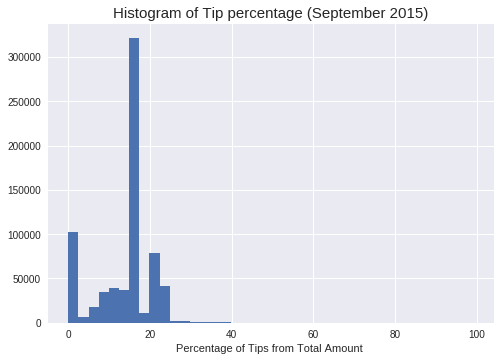

In [36]:
# Histogram of tip percentage
ax = data_trips['tip_percentage'].hist(bins=40)
ax.set(xlabel='Percentage of Tips from Total Amount ')
ax.set_title("Histogram of Tip percentage (September 2015)", size=15)

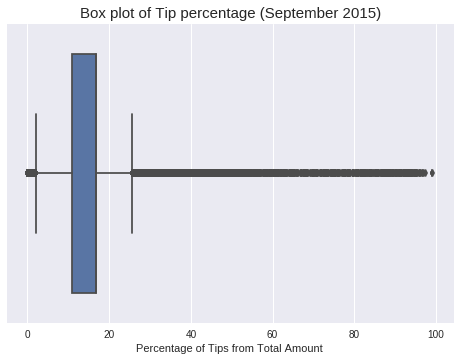

In [37]:
ax = sns.boxplot(data_trips['tip_percentage'])
ax.set(xlabel='Percentage of Tips from Total Amount ')
ax.set_title("Box plot of Tip percentage (September 2015)", size=15)

As we can see from the plot and the data summary, the tip percentage is about 14.1% in average and the majority is within the range from 10% to 16%

##### Features Engineering
Now that we have target variable to be predicted (tip percentage), we will prepare the features for using to predict the tip percentage

Features that we are going to use:
1. Pickup/Dropoff date/time: tip percentage could be varied by day, hour or weekday in a month
2. RateCodeID or trip type
3. Passenger_count
4. Trip distance
5. Trip duration
6. Average speed
7. Fare amount
8. Pickup/Dropoff location: in this model, I will just use latitude and longitude but I could also convert them to other geographic features such as pickup/dropoff neighborhood or zipcode

In [51]:
# Prepare features
# Additional time dimension features
data_trips['weekday_pickup'] = data_trips['pickup_datetime'].dt.weekday
data_trips['weekday_dropoff'] = data_trips['dropoff_datetime'].dt.weekday
data_trips['day_pickup'] = data_trips['pickup_datetime'].dt.day
data_trips['day_dropoff'] = data_trips['dropoff_datetime'].dt.day

# Trip duration feature
data_trips['trip_duration_mins'] = (data_trips['dropoff_datetime'] - data_trips['pickup_datetime']).dt.seconds / 60.0

# Average speed of the trip miles/hours feature
data_trips['avg_speed'] = data_trips['Trip_distance'] * 60 / data_trips['trip_duration_mins']

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inst

In [52]:
# Certain rows have Trip_distance > 0 and trip_duration = 0 so the speed resulted in Infinity (inf)
# We need to replace them by null
data_trips['avg_speed'].replace([np.inf, -np.inf], np.nan, inplace=True)

In [53]:
# Summary of trip duration (mins)
data_trips['trip_duration_mins'].describe()

count    700797.000000
mean         21.060579
std          91.414179
min           0.000000
25%           7.100000
50%          12.016667
75%          19.533333
max        1439.883333
Name: trip_duration_mins, dtype: float64

In [54]:
# Summary of average speed (miles/hour)
data_trips['avg_speed'].describe()

count    700630.000000
mean         15.615160
std         268.060625
min           0.000000
25%           9.688889
50%          12.198929
75%          15.737705
max      202680.000000
Name: avg_speed, dtype: float64

In [55]:
features = ['hour_pickup','hour_dropoff','weekday_pickup','weekday_dropoff','day_pickup','day_dropoff',
            'Fare_amount','RateCodeID','Passenger_count','Trip_distance','trip_duration_mins','avg_speed',
            'Pickup_longitude','Pickup_latitude','Dropoff_longitude','Dropoff_latitude']
target = ['tip_percentage']

In [56]:
data_trips[features].head()

,hour_pickup,hour_dropoff,weekday_pickup,weekday_dropoff,day_pickup,day_dropoff,Fare_amount,RateCodeID,Passenger_count,Trip_distance,trip_duration_mins,avg_speed,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude
0,0,0,1,1,1,1,7.8,5,1,0.00,0.066667,0.000000,-73.979485,40.684956,-73.979431,40.685020
1,0,0,1,1,1,1,45.0,5,1,0.00,0.066667,0.000000,-74.010796,40.912216,-74.010780,40.912212
2,0,0,1,1,1,1,4.0,1,1,0.59,2.566667,13.792208,-73.921410,40.766708,-73.914413,40.764687
5,0,0,1,1,1,1,5.5,1,1,1.07,4.683333,13.708185,-73.945297,40.808186,-73.937668,40.821198
6,0,0,1,1,1,1,6.5,1,1,1.43,4.966667,17.275168,-73.890877,40.746426,-73.876923,40.756306


In [57]:
data_trips[features].isnull().sum()

hour_pickup             0
hour_dropoff            0
weekday_pickup          0
weekday_dropoff         0
day_pickup              0
day_dropoff             0
Fare_amount             0
RateCodeID              0
Passenger_count         0
Trip_distance           0
trip_duration_mins      0
avg_speed             167
Pickup_longitude        0
Pickup_latitude         0
Dropoff_longitude       0
Dropoff_latitude        0
dtype: int64

In [58]:
# Fill null average speed with 0
data_trips['avg_speed'].fillna(0, inplace=True)

##### Model Training
I will use Random Forest Regressor model for prediction. Random Forest is a decision tree ensemble model which is quite popular nowaday and it performs relatively well in many situations,in term of both model accuracy/performance and model overfitting control.

In [59]:
# Split test/train set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_trips[features], data_trips[target], test_size=0.3, random_state=40)

In [61]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((490557, 16), (210240, 16), (490557, 1), (210240, 1))

In [67]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

param_grid = { 
    'n_estimators': [10, 25, 50],
    'max_depth': [4,6,8]
}

rf = RandomForestRegressor(n_estimators=10)

CV_rf = GridSearchCV(estimator=rf, param_grid=param_grid, cv= 5, scoring='neg_mean_squared_error')
CV_rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': [10, 25, 50], 'max_depth': [4, 6, 8]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_squared_error', verbose=0)

In [68]:
print CV_rf.best_params_
#print sorted(CV_rf.cv_results_.keys())

{'n_estimators': 50, 'max_depth': 8}


In [69]:
print CV_rf.best_score_

-52.0237531364


In [73]:
model_rf = RandomForestRegressor(n_estimators=50, max_depth=8)
model_rf.fit(X_train, y_train)

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=8,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=50, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [74]:
from sklearn.metrics import mean_squared_error

y_pred = model_rf.predict(X_test)
print "Mean squared error of test dataset: %s" % mean_squared_error(y_test, y_pred)

Mean squared error of test dataset: 51.4700473744


In [75]:
importances = model_rf.feature_importances_

Feature ranking:
1. feature Dropoff_latitude (0.291493)
2. feature Fare_amount (0.288570)
3. feature Pickup_longitude (0.086369)
4. feature Dropoff_longitude (0.076183)
5. feature RateCodeID (0.072726)
6. feature Pickup_latitude (0.058266)
7. feature trip_duration_mins (0.055982)
8. feature avg_speed (0.018612)
9. feature Trip_distance (0.015125)
10. feature hour_dropoff (0.007202)
11. feature hour_pickup (0.006502)
12. feature day_pickup (0.006437)
13. feature day_dropoff (0.006260)
14. feature weekday_dropoff (0.003730)
15. feature weekday_pickup (0.003514)
16. feature Passenger_count (0.003030)


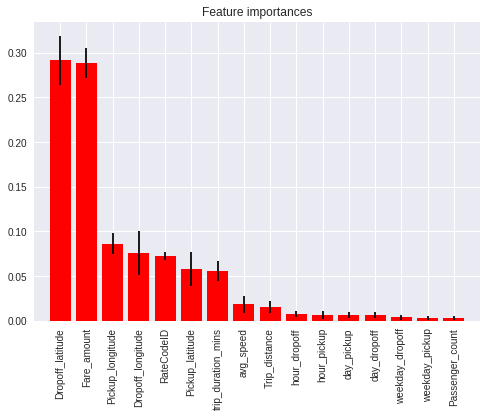

In [86]:
std = np.std([tree.feature_importances_ for tree in model_rf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print("%d. feature %s (%f)" % (f + 1, X_train.columns[indices[f]], importances[indices[f]]))

# Label
label_ticks = [X_train.columns[i] for i in indices]
    
# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), label_ticks, rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()

##### Additional Ideas to improve the predictive model
Random forest works relatively well with mean squared error at about 55. However, there are several opportunities to improve the model performance. 
1. Parameter tuning
Fine-tuning parameter would definitely increase model performance, for example, by increasing number of trees (n_estimators) in the model. However, increasing number of trees will also increase training time and require larger computing power. Other parameters we could adjust are min_sample_leaf and max_features.
2. Using other models
I have also tried using Linear regression and Ridge regression models and they both performed comparably with the random forest regressor model with n_estimators = 10. However, increasing the number of trees in random forest model would be likely to outperform linear regression and ridge regression, which have limitation in parameter tuning to improve model performance. Nevertheless, the benefit of using the linear models over random forest is that it can be trained much faster.
3. Additional Features and Feature Engineering
Adding new features would potentially improve model performance but it would require more time for trying several different features and doing cross validation. For example, I actually tried one-hot encoding for some categorical variables such hour and day pick-up/drop-off in the linear model, but it did not improve the performance of the model without one-hot encoding. 

In [88]:
# Linear Regression and Ridge Regression models
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression, Ridge

lm1 = LinearRegression()
lm1.fit(X_train, y_train)
print "Linear Regression"
scores = cross_val_score(lm1, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
print scores

ridge1 = Ridge()
ridge1.fit(X_train, y_train)
print "Ridge Regression"
scores = cross_val_score(lm1, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
print scores

Linear Regression
[-57.55571403 -56.88609746 -57.79062582 -59.73853017 -59.07367328]
Ridge Regression
[-57.55571403 -56.88609746 -57.79062582 -59.73853017 -59.07367328]


In [89]:
##### Linear Regression Model with One-hot encoding
from sklearn.preprocessing import OneHotEncoder
from scipy import sparse

category_features = ['hour_pickup','hour_dropoff','weekday_pickup','weekday_dropoff','day_pickup','day_dropoff','RateCodeID']
num_features = ['RateCodeID','Passenger_count','Trip_distance',
            'Pickup_longitude','Pickup_latitude','Dropoff_longitude','Dropoff_latitude']

enc = OneHotEncoder()
train_encoded = enc.fit_transform(X_train[category_features])
test_encoded = enc.fit_transform(X_test[category_features])

x_train_data = sparse.hstack([X_train[num_features], train_encoded]).tocsr()
x_test_data = sparse.hstack([X_test[num_features], test_encoded]).tocsr()

lm = LinearRegression()
lm.fit(x_train_data, y_train)
scores = cross_val_score(lm, x_train_data, y_train, cv=5, scoring='neg_mean_squared_error')
print "Linear Regression (one-hot encoding)" 
print scores

ridge = Ridge()
ridge.fit(x_train_data, y_train)
scores = cross_val_score(ridge, x_train_data, y_train, cv=5, scoring='neg_mean_squared_error')
print "Ridge Regression (one-hot encoding)"
print scores

Linear Regression (one-hot encoding)
[-57.62029112 -56.87527537 -57.61194555 -56.55800218 -58.94347929]
Ridge Regression (one-hot encoding)
[-57.6448547  -56.91785988 -57.66214749 -56.58606577 -58.97009969]


#### Question 5

###### Option C: Search
We’re thinking about promoting ride sharing. Build a function that given point a point P, find the k trip origination points nearest P.
For this question, point P would be a taxi ride starting location picked by us at a given LAT-LONG.
As an extra layer of complexity, consider the time for pickups, so this could eventually be used for real time ride sharing matching.
Please explain not only how this can be computed, but how efficient your approach is (time and space complexity)

In [90]:
#search_trips = clean_trips[(clean_trips.Pickup_longitude!=0) & (clean_trips.Pickup_latitude!=0)]

In [147]:
from sklearn.neighbors import KDTree
import datetime

def find_k_nearest_points(lon, lat, k, current_time=datetime.datetime.now()):
    # Load trip data in past 5 minutes (300 seconds)
    last_5_mins_trips = clean_trips[(current_time - clean_trips['pickup_datetime']).dt.total_seconds() < 300].reset_index()
    #last_5_mins_trips = clean_trips
    # Construct KD Tree from the pickup points from last 10 mins trips
    points = last_5_mins_trips[['Pickup_longitude','Pickup_latitude']]
    if len(points) > 0:
        tree = KDTree(points)
        # Query k nearest points
        point_query = np.array([lon,lat]).reshape(1,-1)
        dist, ind = tree.query(point_query, k=k)
        # Return k VendorID and Pickup lat/lon coordinates
        k_points = last_5_mins_trips.loc[ind.tolist()[0],['index','Pickup_longitude','Pickup_latitude']]
        return k_points
    else:
        return []

In [148]:
# Test function
current = datetime.datetime(2015, 9, 29, 16, 29, 43)
result = find_k_nearest_points(-73.958844, 40.682388, 5, current)

In [150]:
# Display 5 nearest starting locations from (-73.958844, 40.682388)
result

,index,Pickup_longitude,Pickup_latitude
33042,1461320,-73.958656,40.682400
55688,1483966,-73.958679,40.682213
32547,1460825,-73.958672,40.682556
39858,1468136,-73.958618,40.682083
26297,1454575,-73.958641,40.682030


I used KD-Tree data structure for this search algorithm. KD-Tree is a space-partitioning data structure for k-dimensional space. In our case with 2 dimensional space (latitude and longitude), KD-Tree can be efficient for searching nearest data points in coordinate plane. The algorithm in the search function is as follow:
1. Query all taxi starting location (lat/lon) within specific time window (e.g. last 5 minutes)
2. Construct KD-Tree from the data query. By iteratively segmenting midpoint in coordinates space, KD-Tree is constructed and store data points in tree leaves. (For sklearn implementation, it uses median as midpoint). The time complexity for constructing KD-Tree is O(nlog(n)) its space complexity = O(n).
3. Search for K nearest points in the tree, in which the time complexity of the search is O(log(n)), and return those points and index as output

I did not implement the KDTree from scratch but used KDTree function from sklearn package for convenience. In real-time application, we might consider reconstructing KDTree every specific time interval so we do not need to constructing KD-Tree for every search query. Also, we might need to limit the area when query taxi location data points e.g. query all taxi starting locations within last 5 minutes and within 5 miles from the query location.